## Import data

The data is sourced from Kaggle.This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Feature Columns

- id: Unique ID for each home sold
- date: Date of the home sale
- price: Price of each home sold
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living: Square footage of the apartments interior living space
- sqft_lot: Square footage of the land space
- floors: Number of floors
- waterfront: - A dummy variable for whether the apartment was overlooking the waterfront or not
- view: An index from 0 to 4 of how good the view of the property was
- condition: - An index from 1 to 5 on the condition of the apartment
- grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
- sqft_above: The square footage of the interior housing space that is above ground level
- sqft_basement: The square footage of the interior housing space that is below ground level
- yr_built: The year the house was initially built
- yr_renovated: The year of the house’s last renovation
- zipcode: What zipcode area the house is in
- lat: Lattitude
- long: Longitude
- sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel(r'C:\Users\GRZEGORZ\OneDrive\Pulpit\House Data.xlsx')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<br>

## Cleaninig data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
df = df.drop('date', axis=1)

<br>

## Variable Analysis

In [6]:
df['price'].describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

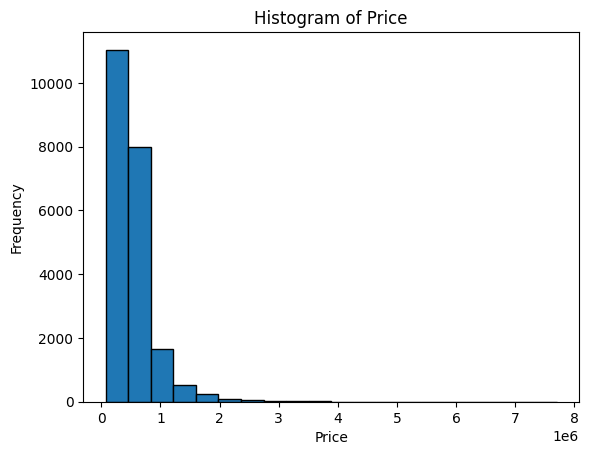

In [7]:
plt.hist(df['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.rcParams['figure.figsize'] = [16, 6]
plt.show()

In [8]:
print("Skewness:")
print(df['price'].skew())

print("\nKurtosis:")
print(df['price'].kurtosis())

Skewness:
4.024069144684712

Kurtosis:
34.58554043194243


<br>

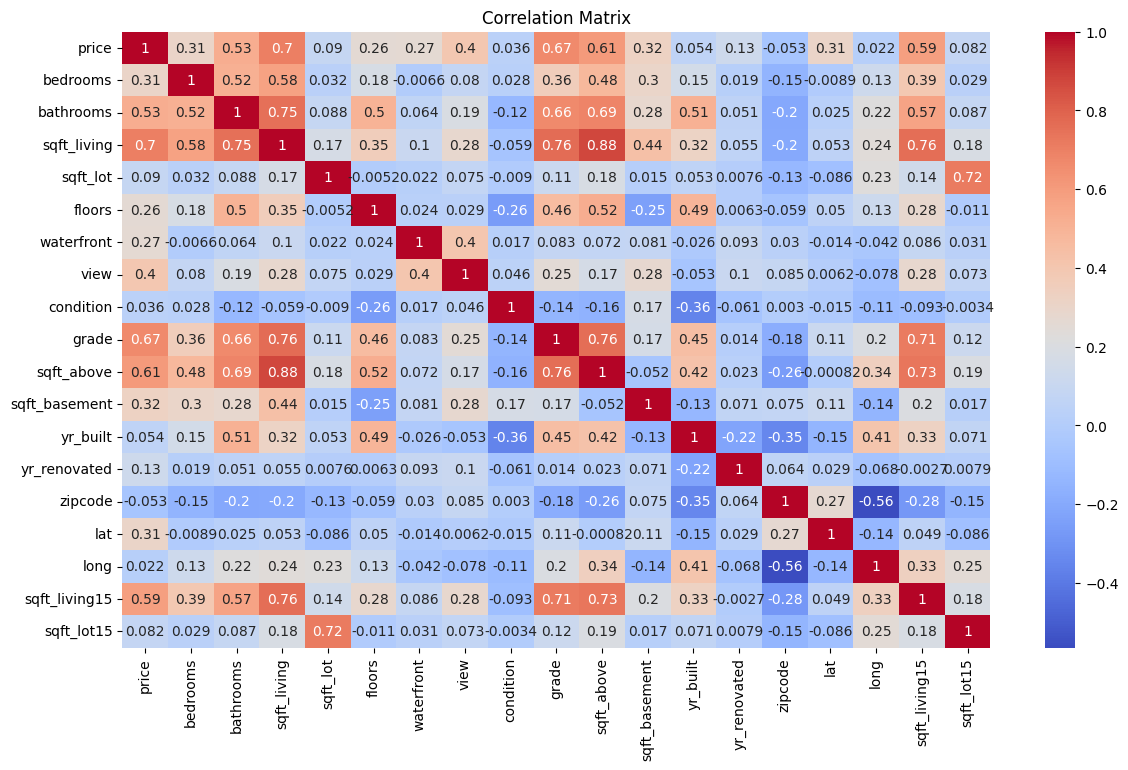

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

An analysis reveals a strong correlation between the <code>price</code> variable and the features <code>sqft_living</code> (0.7), <code>grade</code> (0.67) and <code>sqft_above</code> (0.61). This correlation suggests that these variables exert the most significant influence on determining the price. Consequently, variations in square footage of living space, overall grade assigned to the property and square footage above ground level are pivotal factors shaping the pricing dynamics.

<br>

### Bedrooms

In [21]:
df['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

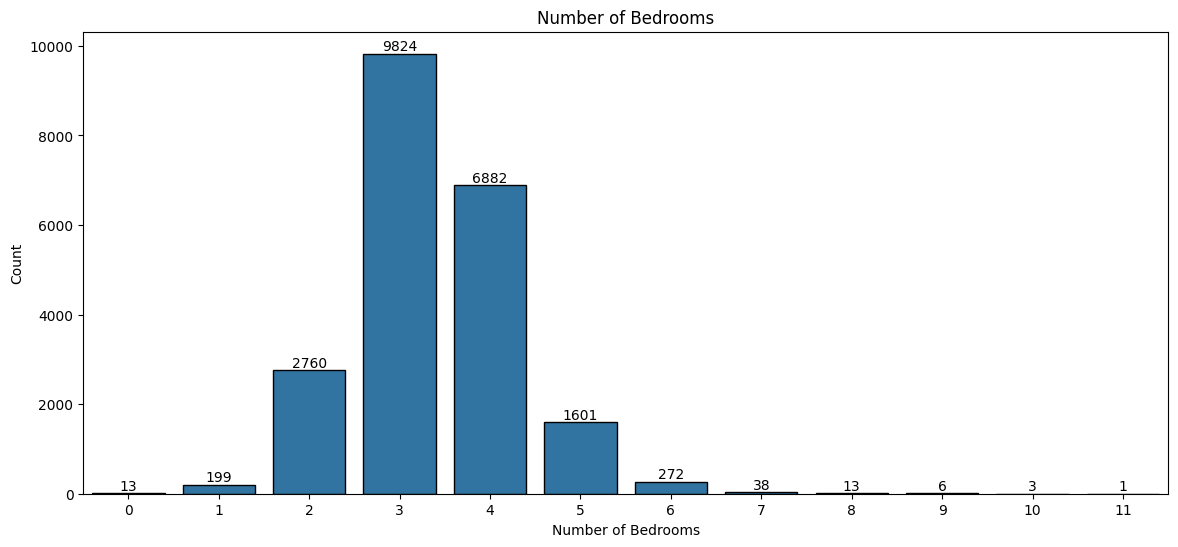

In [37]:
plt.figure(figsize=(14, 6))
sns.countplot(x='bedrooms', data=df, edgecolor='black')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Number of Bedrooms')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

The data highlights a notable trend in the number of bedrooms among sold properties, with a significant portion comprising 9824 units featuring 3 bedrooms, followed closely by 6882 units with 4 bedrooms. Moreover, it's evident that the vast majority of transactions involve properties with between 2 and 5 bedrooms, indicating a preference within this range. Interestingly, only a mere 62 out of 21,613 sold properties boast more than 6 bedrooms, suggesting that such properties are comparatively less common in the market.

<br>

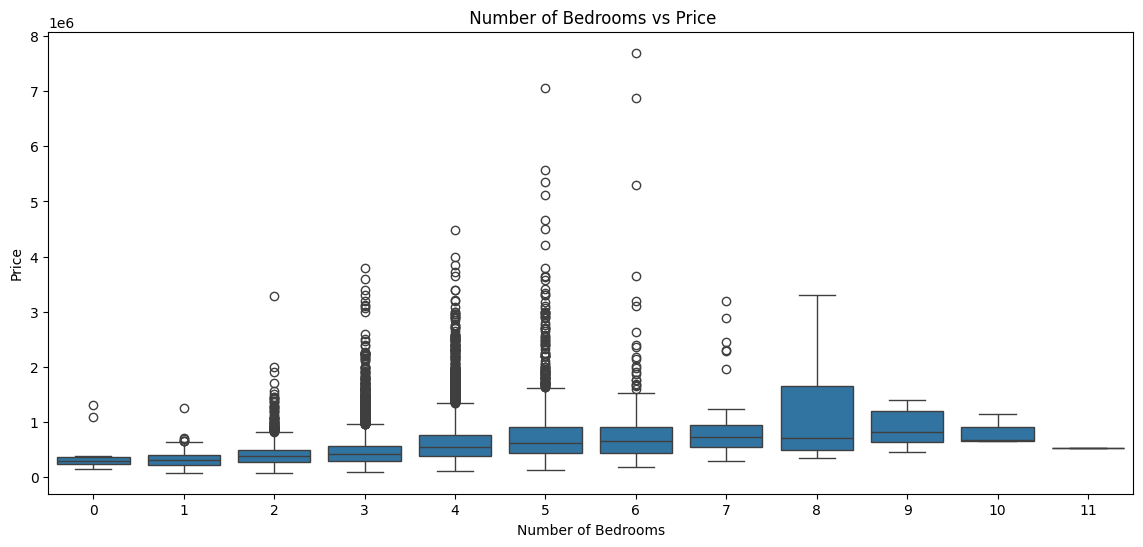

In [61]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title(' Number of Bedrooms vs Price')
plt.show()

Examining the above box plot, a clear pattern emerges: as the number of bedrooms increases, so does the spread of prices, indicated by larger box sizes. It is noteworthy that the highest concentration of outliers occurs within the range of properties with 2 to 5 bedrooms, which aligns with our earlier observation that the majority of transactions involve properties within this range. Additionally, there are also numerous outliers present for properties with 6 bedrooms, underscoring the trend that a higher number of bedrooms corresponds to a wider range of prices.

<br>

### Bathrooms

In [36]:
df['bathrooms'].describe()

count    21612.000000
mean         2.114774
std          0.770177
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

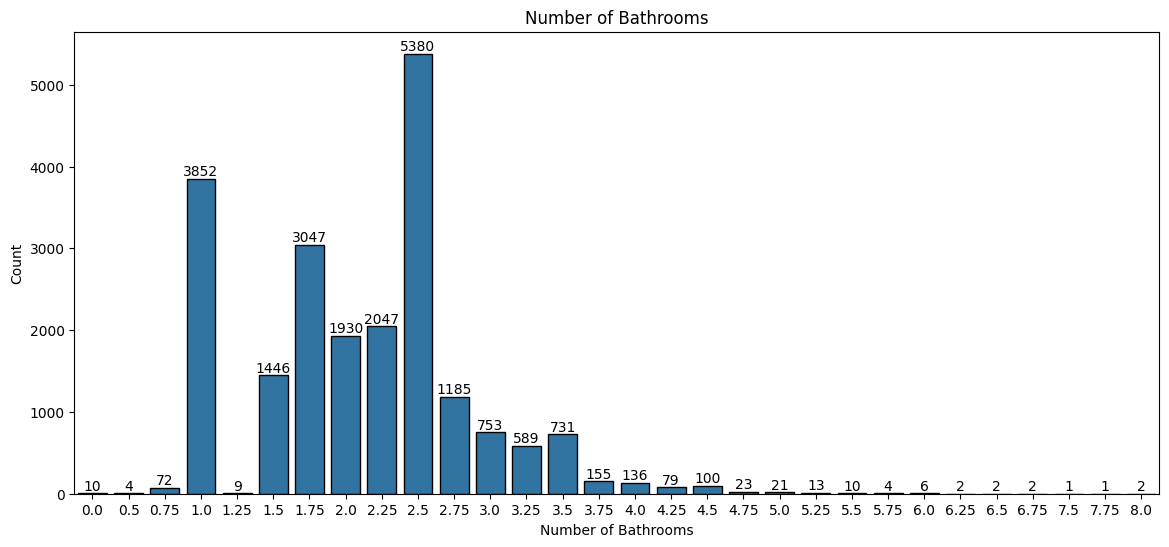

In [33]:
plt.figure(figsize=(14, 6))
sns.countplot(x='bathrooms', data=df, edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Number of Bathrooms')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

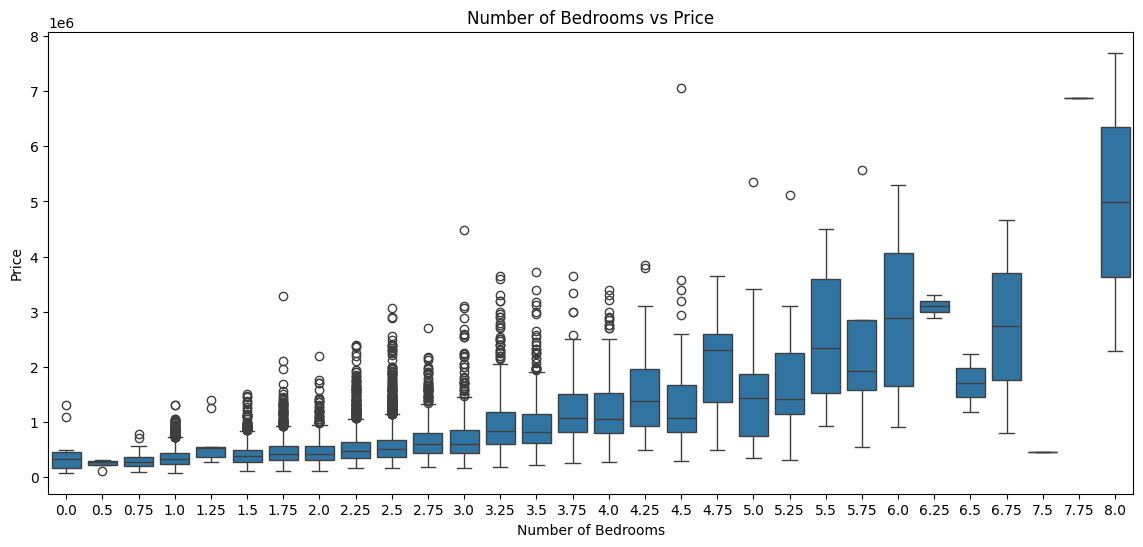

In [39]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['bathrooms'], y=df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')
plt.show()

Similarly to the observations made regarding the number of bedrooms, the box plot for the number of bathrooms illustrates a comparable trend: as the number of bathrooms increases, there is a noticeable widening of the price range.

<br>

### Sqft_living

In [40]:
df['sqft_living'].describe()

count    21612.000000
mean      2079.921016
std        918.456818
min        290.000000
25%       1426.500000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

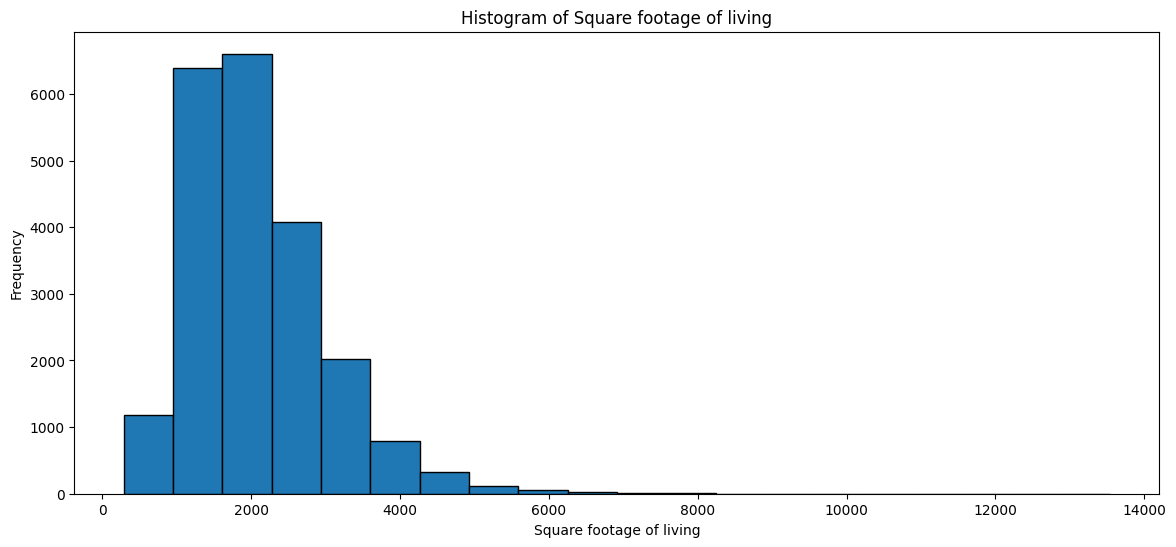

In [44]:
plt.figure(figsize=(14, 6))
plt.hist(df['sqft_living'], bins=20, edgecolor='black')
plt.xlabel('Square footage of living')
plt.ylabel('Frequency')
plt.title('Histogram of Square footage of living')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

The above histogram depicts the distribution of square footage of living space. It's evident that the majority of sold houses have a square footage of living space falling within the range of 1500 to 2500. Additionally, the distribution's tail is thick, indicating the presence of outliers, suggesting that there are houses with significantly higher square footage of living space compared to the bulk of the dataset.

<br>

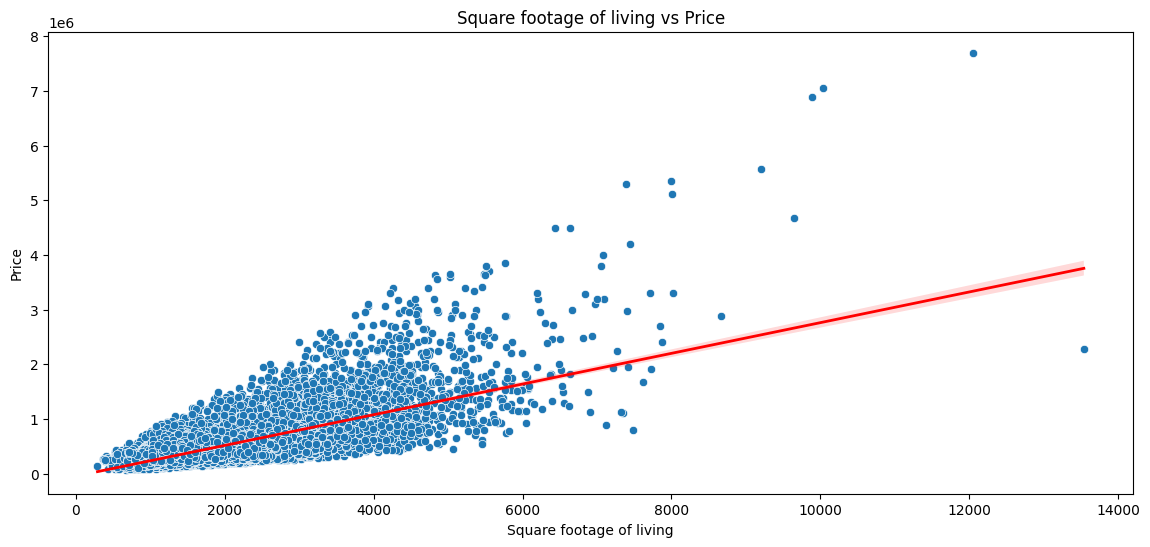

In [48]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
sns.regplot(x='sqft_living', y='price', data=df, scatter=False, color='red', line_kws={'linewidth': 2})
plt.xlabel('Square footage of living')
plt.ylabel('Price')
plt.title('Square footage of living vs Price')
plt.show()

In [53]:
from sklearn.metrics import r2_score

slope, intercept = np.polyfit(df['sqft_living'], df['price'], 1)
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
print(line_eq)
predicted_price = slope * df['sqft_living'] + intercept
r2 = r2_score(df['price'], predicted_price)
print(f"R-squared: {r2:.2f}")

y = 280.63x + -43603.35
R-squared: 0.49


The scatter plot above illustrates the relationship between square footage of living space and price. To assess the influence of square footage of living space on price, a linear trend function was estimated, yielding the equation:\
y = 280.63x - 43605.35\
which can be interpreted as: an increase in square footage of living space for example by 1000 square footage will result in a price increase of approximately 237024.65 USD

<br>

### Sqft_lot

In [55]:
df['sqft_lot'].describe()

count    2.161200e+04
mean     1.510739e+04
std      4.142142e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.619000e+03
75%      1.068825e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

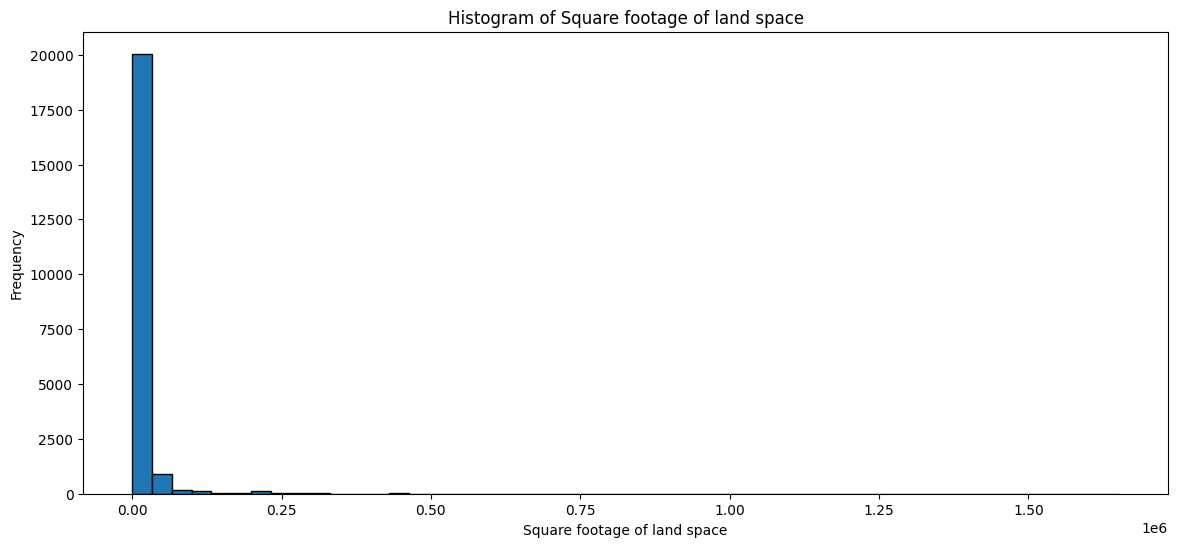

In [58]:
plt.figure(figsize=(14, 6))
plt.hist(df['sqft_lot'], bins=50, edgecolor='black')
plt.xlabel('Square footage of land space')
plt.ylabel('Frequency')
plt.title('Histogram of Square footage of land space')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

From the histogram above, it can be inferred that the vast majority of square footage of land space for sold homes falls within the range of 0 to 45000, encompassing approximately 95% of all values. Additionally, the histogram exhibits a very thick tail, suggesting the presence of outliers, indicating values that significantly deviate from the bulk of the data.

<br>

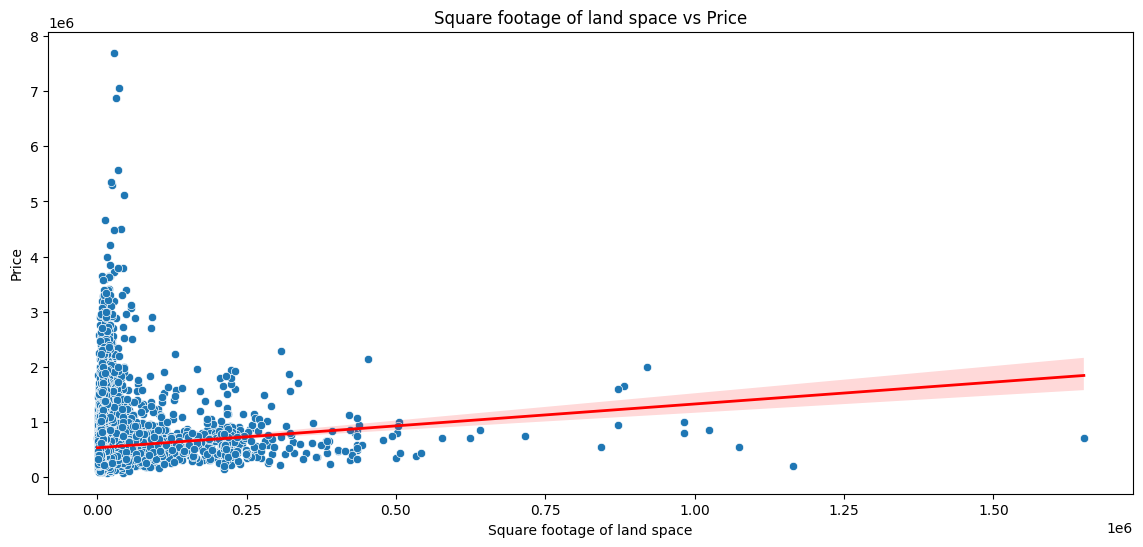

In [59]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='sqft_lot', y='price', data=df)
sns.regplot(x='sqft_lot', y='price', data=df, scatter=False, color='red', line_kws={'linewidth': 2})
plt.xlabel('Square footage of land space')
plt.ylabel('Price')
plt.title('Square footage of land space vs Price')
plt.show()

In [60]:
slope, intercept = np.polyfit(df['sqft_lot'], df['price'], 1)
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
print(line_eq)
predicted_price = slope * df['sqft_lot'] + intercept
r2 = r2_score(df['price'], predicted_price)
print(f"R-squared: {r2:.2f}")

y = 0.79x + 528077.26
R-squared: 0.01


Similarly to the variable <code>bedrooms</code>, a scatter plot was generated to illustrate the relationship between the number of bathrooms and the price of sold homes. Additionally, a trend function was created. However, it's noteworthy that in this case, the trend function might not be the most suitable option, as the R-squared value is merely 1%.

<br>

### Floors

In [70]:
df.groupby('floors')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
floors,,,,,,,,
1.0,10679.0,4.421621e+05,264008.663428,75000.0,275000.0,390000.0,530000.0,4668000.0
1.5,1910.0,5.589806e+05,303541.333191,92000.0,355000.0,524475.0,687875.0,3650000.0
2.0,8241.0,6.488912e+05,433937.656294,90000.0,378800.0,542950.0,772500.0,7062500.0
2.5,161.0,1.060346e+06,858259.485933,255000.0,550000.0,799200.0,1300000.0,7700000.0
3.0,613.0,5.825260e+05,338249.166345,205000.0,385000.0,490000.0,631500.0,3100000.0
3.5,8.0,9.333125e+05,978616.477391,435000.0,513500.0,534500.0,696375.0,3300000.0


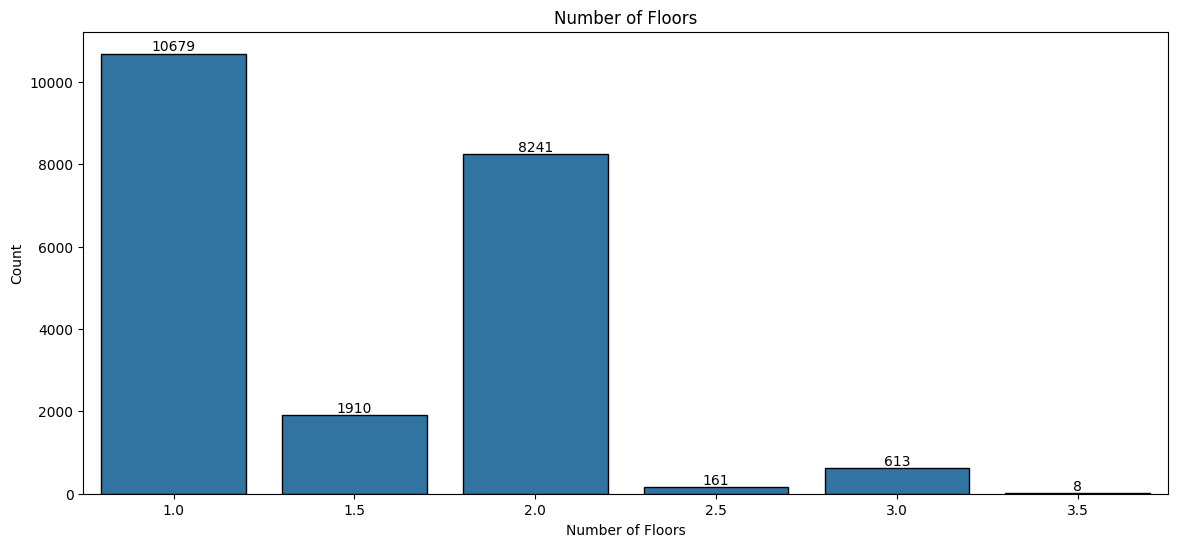

In [66]:
plt.figure(figsize=(14, 6))
sns.countplot(x='floors', data=df, edgecolor='black')
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.title('Number of Floors')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Among the sold homes, the majority consist of single-story properties (10679) followed closely by two-story homes (8241). It is noticeable from the chart that there are significantly fewer sold homes with an additional half-story.

<br>

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_7296\2345468222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['floors'], y=df['price'], palette="Set2")


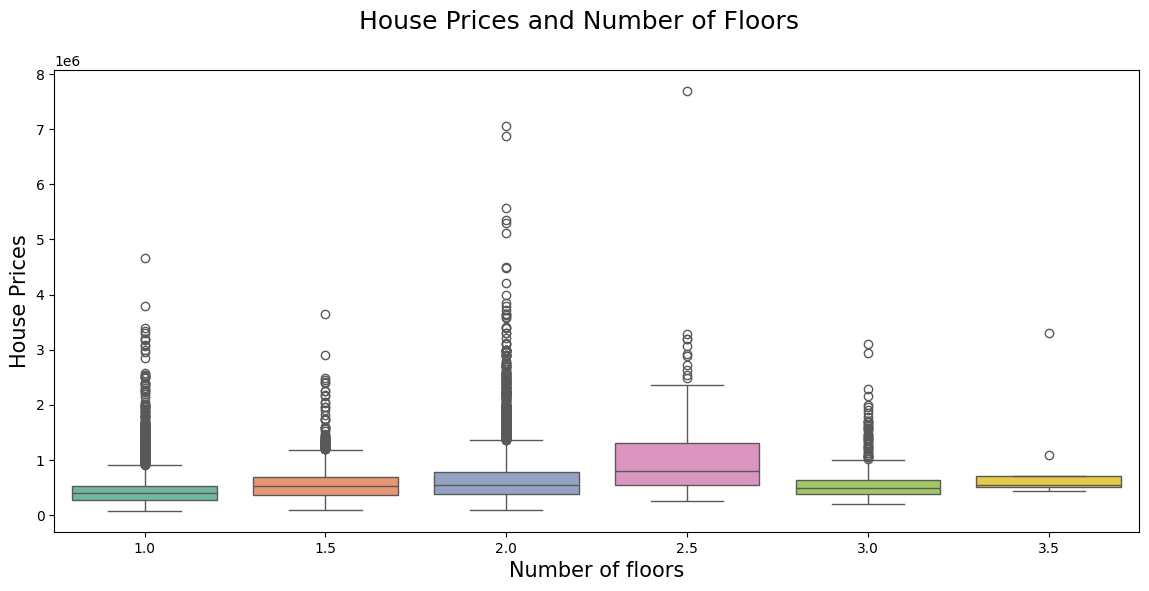

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(x = df['floors'], y=df['price'], palette="Set2")
plt.suptitle('House Prices and Number of Floors', size=18)
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()

Analyzing the box plot, we observe that there isn't a significant price spread based on the number of floors, except for homes with 2.5 floors. However, it's crucial to note that this spread results from a small number of sold homes with such a specific floor count. Additionally, it's worth mentioning that the most expensive sold homes tend to have two floors, as evidenced by the presence of outliers in that category.

<br>

### Waterfront

In [72]:
df['price'].groupby(df['waterfront']).describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,21449.0,5.315585e+05,3.416068e+05,75000.0,320000.0,450000.0,639888.0,7700000.0
1,163.0,1.661876e+06,1.120372e+06,285000.0,760000.0,1400000.0,2215000.0,7062500.0


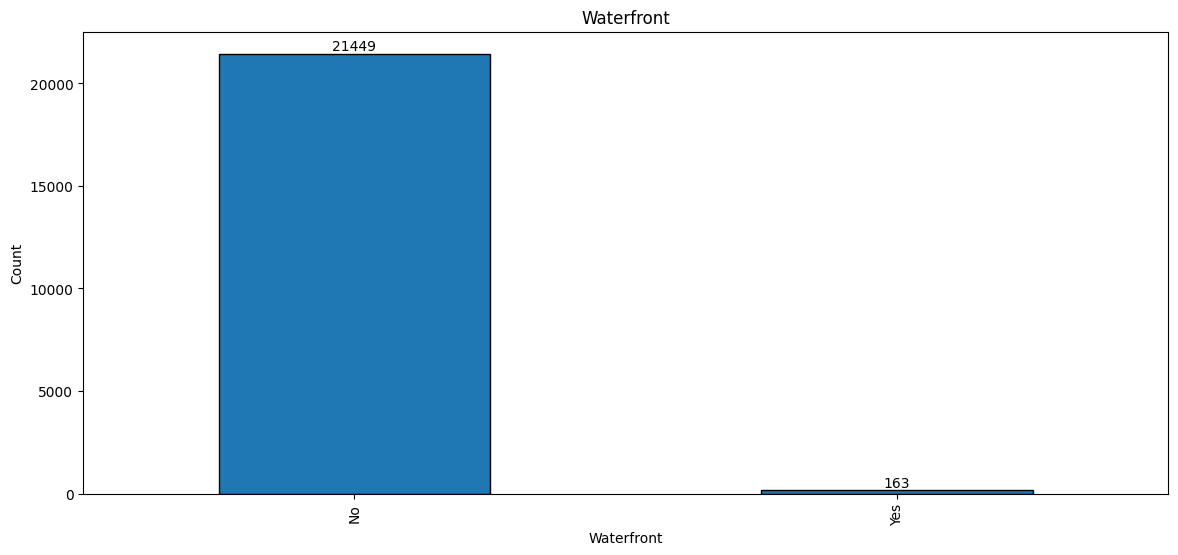

In [77]:
plt.figure(figsize=(14, 6))
ax = df['waterfront'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.title('Waterfront')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

The overwhelming majority of sold homes, totaling 21449 are not waterfront properties, whereas only 163 homes are located on the waterfront.

<br>

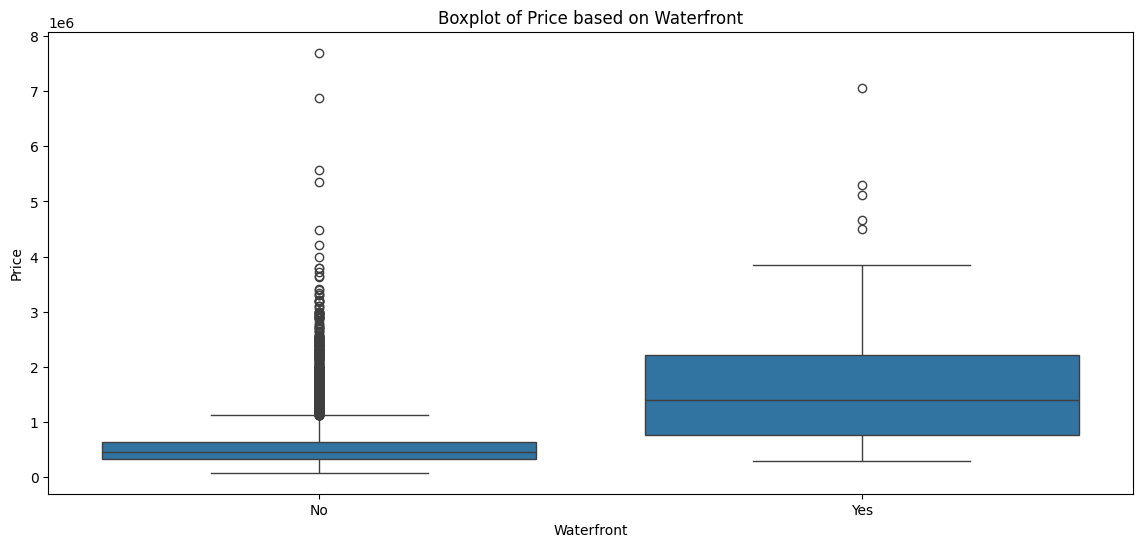

In [78]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['waterfront'], y=df['price'])
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Boxplot of Price based on Waterfront')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Analyzing the box plot, we can observe that for homes not situated on the waterfront, there is relatively little variability in prices, but numerous outliers exist due to a large number of observations. However, for waterfront properties, the price range is considerably wider. The average price for a waterfront home is $1,661,876, whereas for non-waterfront homes, it is $531,558—over two times lower. Based on the aforementioned box plot, we can conclude that the <code>waterfront</code> variable significantly differentiates prices depending on whether the sold home is waterfront or not.

<br>

### View

In [79]:
df['price'].groupby(df['view']).describe() 

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
0,19488.0,4.965568e+05,287138.829488,75000.0,311000.0,432500.0,600000.0,5570000.0
1,332.0,8.122808e+05,510949.684596,217000.0,498750.0,690944.0,921250.0,3650000.0
2,963.0,7.924009e+05,510105.050867,169317.0,485000.0,675000.0,941250.0,7062500.0
3,510.0,9.719653e+05,612692.235943,154000.0,554000.0,802500.0,1256000.0,7700000.0
4,319.0,1.463711e+06,952209.550006,252000.0,817500.0,1185000.0,1850000.0,6885000.0


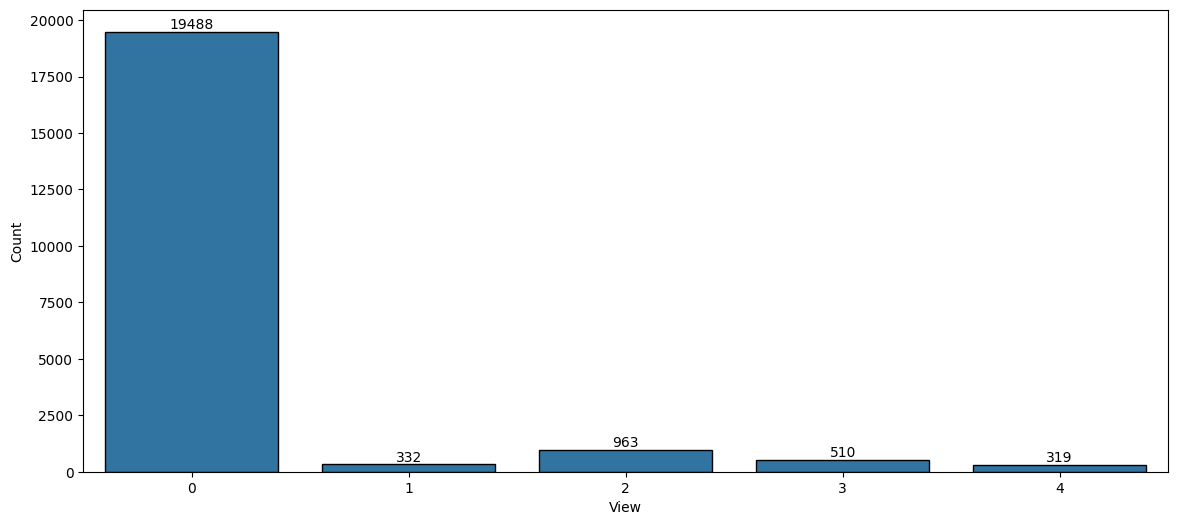

In [85]:
plt.show()
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='view', data=df, edgecolor='black')
plt.xlabel('View')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

The above chart describes how good the view of the property was on a scale from 0 to 4, where higher numbers indicate better views. From the chart, it is evident that the vast majority of views for sold homes were rated as 0 (as many as 19488).

<br>

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_7296\44127929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['view'], y=df['price'], palette='Set3')


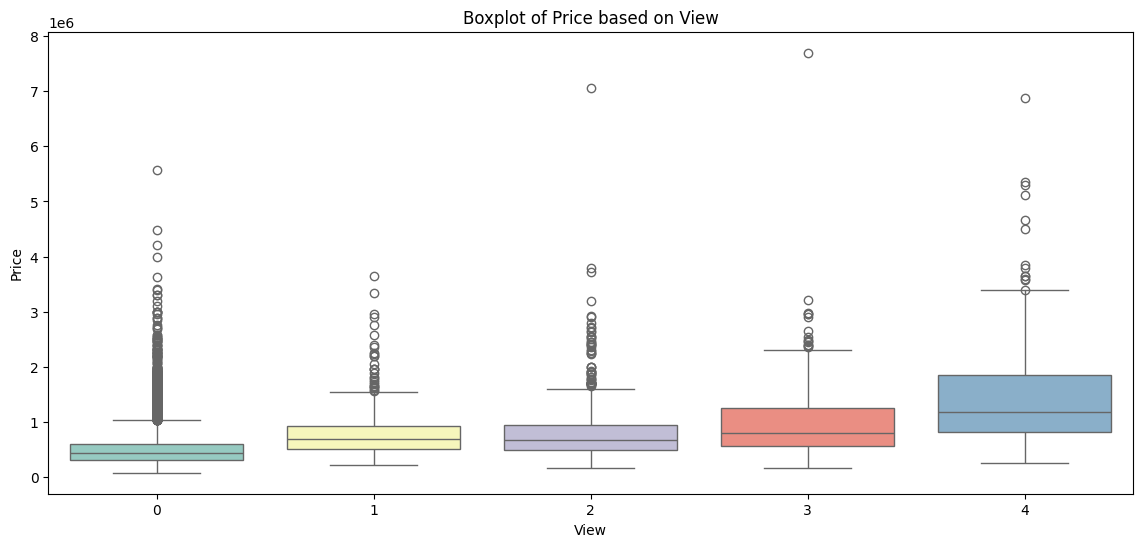

In [81]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['view'], y=df['price'], palette='Set3')
plt.xlabel('View')
plt.ylabel('Price')
plt.title('Boxplot of Price based on View')
plt.show()

The better the view rating, the greater the price variability. Additionally, as one might expect, logically, higher view ratings correspond to higher average home prices, with the exception being that for homes with a view rating of 1, the average price is higher than those with a rating of 2. Upon examining the outliers, it becomes apparent that the most expensive homes sold had a view rating of 4, which aligns with expectations.

<br>

### Condition

In [86]:
df['price'].groupby(df['condition']).describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,30.0,334431.666667,271172.804837,78000.0,160000.0,262500.0,431125.0,1500000.0
2,172.0,327287.145349,245418.413220,80000.0,189750.0,279000.0,397300.0,2555000.0
3,14031.0,542012.578148,364449.062343,75000.0,329500.0,450000.0,640000.0,7062500.0
4,5679.0,521200.390033,358516.231350,89000.0,305000.0,440000.0,625000.0,7700000.0
5,1700.0,612401.864706,411092.305057,110000.0,349997.5,525944.0,725000.0,3650000.0


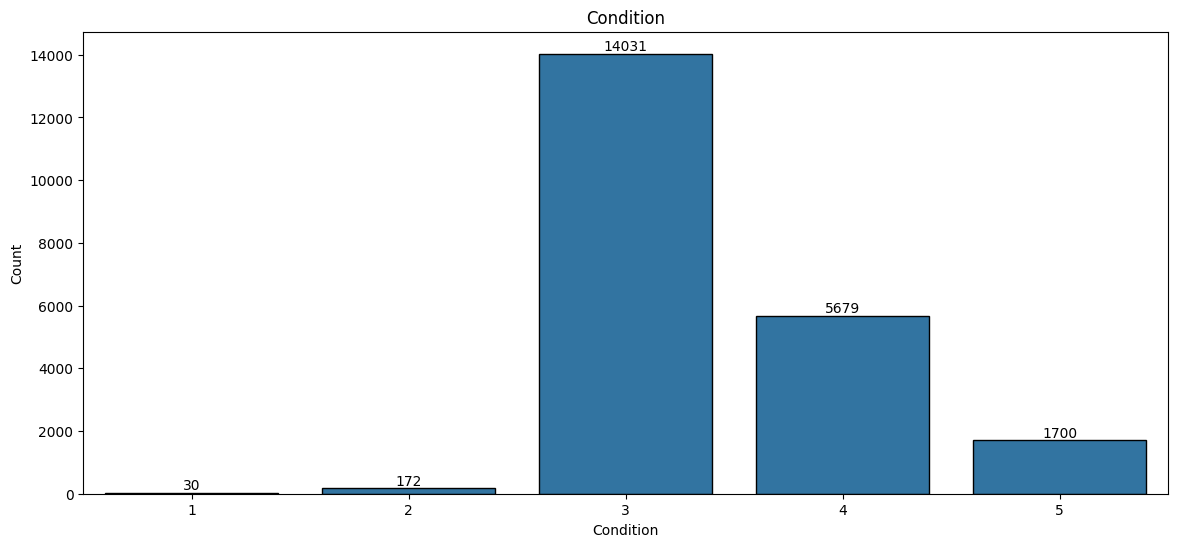

In [87]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='condition', data=df, edgecolor='black')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Condition')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.show()

The chart illustrates the distribution of sold homes categorized by their condition rating, where higher ratings denote better condition. It is notable that the majority of homes have a condition rating of 3. Conversely, only 202 sold homes have a rating of 1 or 2, with just 30 homes receiving a rating of 1.

<br>

### Grade

In [88]:
df['price'].groupby(df['grade']).describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
1,1.0,1.420000e+05,NaN,142000.0,142000.0,142000.0,142000.0,142000.0
3,3.0,2.056667e+05,1.135180e+05,75000.0,168500.0,262000.0,271000.0,280000.0
4,29.0,2.143810e+05,9.430617e+04,80000.0,145000.0,205000.0,265000.0,435000.0
5,242.0,2.485240e+05,1.181003e+05,78000.0,175000.0,228700.0,295750.0,795000.0
6,2038.0,3.019196e+05,1.229703e+05,82000.0,215037.5,275276.5,366837.5,1200000.0
7,8980.0,4.025638e+05,1.558655e+05,90000.0,285000.0,375000.0,485000.0,2050000.0
8,6068.0,5.428528e+05,2.174734e+05,140000.0,390000.0,510000.0,640000.0,3070000.0
9,2615.0,7.735132e+05,3.161201e+05,230000.0,571500.0,720000.0,880000.0,2700000.0
10,1134.0,1.071771e+06,4.835451e+05,316000.0,768087.5,914327.0,1250000.0,3600000.0


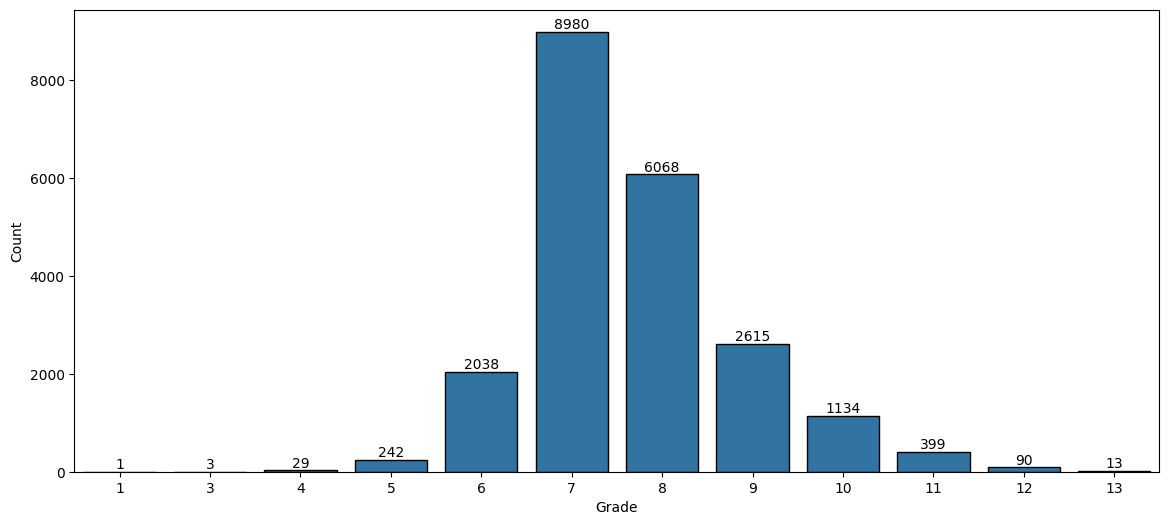

In [90]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='grade', data=df, edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

As evident from the chart, the majority of sold homes have a design rating hovering around 7, signifying a moderate level of design quality. It's worth noting that only 4 sold homes had a design rating ranging from 1 to 3, indicating a low-quality design. Conversely, slightly over 500 homes received a design rating ranging from 11 to 13, indicating a high level of design quality.

<br>

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_7296\317224247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['grade'], y=df['price'], palette='Set3')


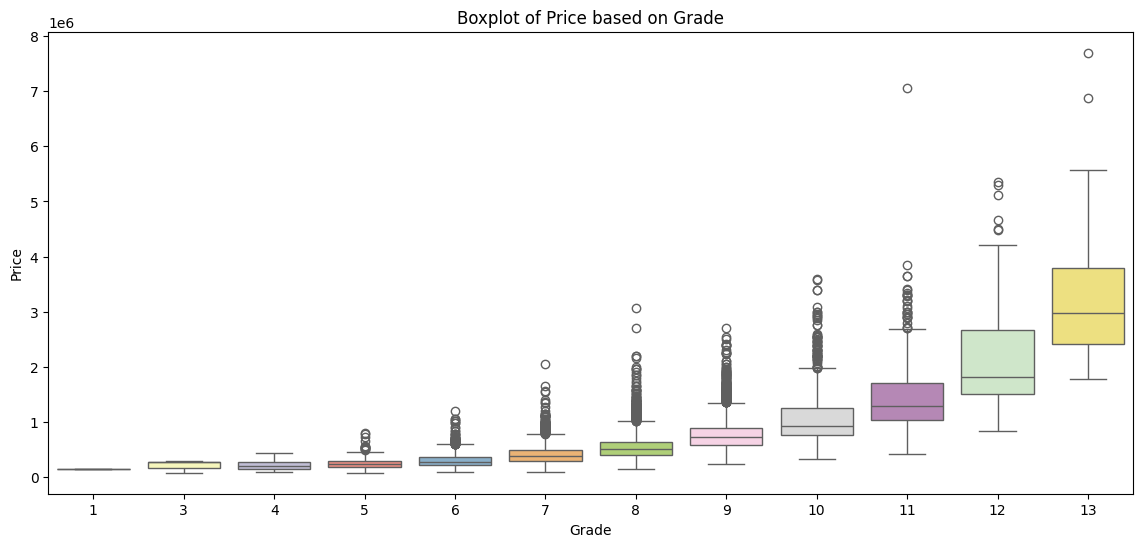

In [92]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['grade'], y=df['price'], palette='Set3')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Boxplot of Price based on Grade')
plt.show()

As expected, higher design ratings correlate with higher average sold home prices and greater price discrepancies.Additionally, it's noteworthy that the most expensive sold homes typically have design ratings ranging from 11 to 13, indicating a high level of design quality. Furthermore, it's essential to highlight that the <code>grade</code> variable significantly influences the pricing dynamics of sold homes.